# Ford GoBike System Analysis (July 2018 to June 2019)
## by Yuski X

## Investigation Overview

> In this project, I want to focus on the relationship among users' type on the Bike Rental Services in Bay Area. The way I am going to present is based on the amount of users' daily and weekly bike usage.

## Dataset Overview

> Bay Wheels (Ford GoBike) is a regional public bicycle sharing system in the San Francisco Bay Area. It becomes the first regional and large-scale bicycle sharing system deployed in California. As of January 2018, the system had seen nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers.
This project explores the Ford GoBike's trip data for public containing approximately 2,289,396 bike rides for a full calendar year (July 2018 to June 2019). The dataset includes info regarding users' general info, bike rental info, etc. After I cleaned the dataset, there are total 2,151,147 data points left.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

import glob
import os

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
df_new = pd.read_csv('all_in_one.csv')

## Bike Rental Analysis - User Type

> Ford GoBike System offers two types of purchases, one is Customer (single-ride user) and the other one is Subscriber (membership user). Results show that majority clients (88.3%) are local residents (subscribers), only 11.7% are customers.

In [7]:
customer = df_new.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_new.query('user_type == "Subscriber"')['bike_id'].count()

customer_perc = customer / df_new['bike_id'].count()
subscriber_perc = subscriber / df_new['bike_id'].count()

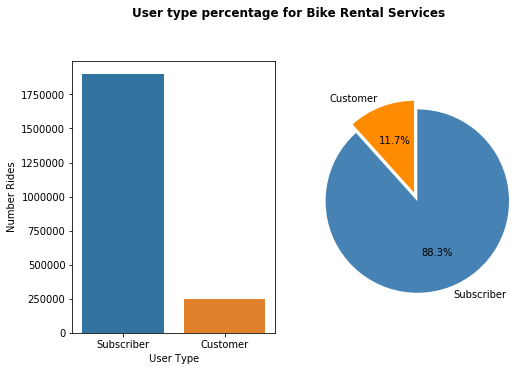

In [11]:
plt.figure(figsize = [8, 5])
plt.subplot(1, 2, 1)

g = sb.countplot(data=df_new, x="user_type", order=df_new.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Number Rides')

# pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_perc, subscriber_perc]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.suptitle('User type percentage for Bike Rental Services', y=1.03, fontsize=12, fontweight='semibold');

## Daily and Weekly Bike Usage - User Type

> The users split into two groups: customers and subscribers. The heatmap demonstrates that two groups have different renting behaviors: One is for tour purpose, the other one is for commute, respectively.

> Customers use bike rental services more often during weekends.
- Weekdays: Most popular time slots for bike rental is happened at 8-9am and 5-6pm, with the peak at 5pm on Friday. Most bike rides happen around 8-9am and 5-6pm with the peak on Thursday and Fridays around 5pm. In addition, besides those peak hours, the bike rentals is pretty balanced during the day from 7am-7pm, and there are more users using the bike in the early afternoon compared to subscribers. 
- Weekends: Most popular time slots for bike rental is happened between 9am to 7pm, with the peak at 2pm on Saturday. Also  Saturday starting from 11am to 5pm, bikes are always on high demand.

> Subscribers use bike rental services more often during weekdays.
- Weekdays: Most popular time slots for bike rental is happend at 8-9am and 5-6pm everyday on the weekday, it is very consistant. The peak happened at 8am on Tuesdays.
- Weekends: There are not much users renting bikes during the entire days on the weekends compared to customers. The drop is significant.

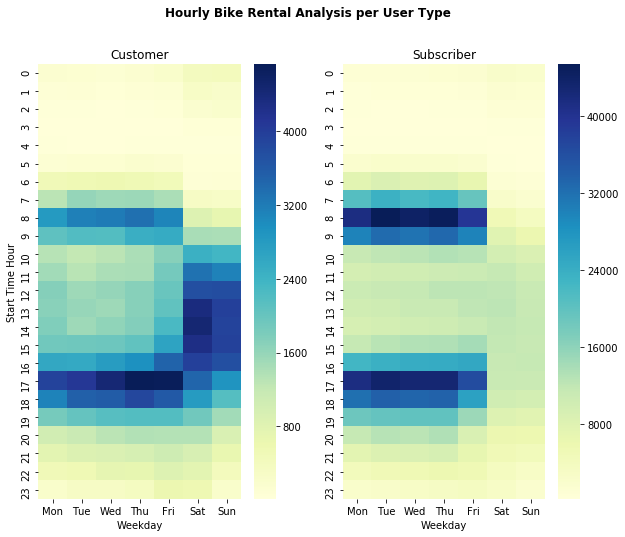

In [12]:
df_new['start_time_weekday'] = pd.Categorical(df_new['start_time_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
plt.figure(figsize=(10,8))
plt.suptitle('Hourly Bike Rental Analysis per User Type', fontsize=12, fontweight='semibold')

# heatmap (customers)
plt.subplot(1, 2, 1)
df_customer = df_new.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="YlGnBu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap (subscribers)
plt.subplot(1, 2, 2)
df_subscriber = df_new.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="YlGnBu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

## Trip During - User Type

> Based on the boxplot, we can see that customers usually spent more time on bike rentals than for subscribers. This can be explained by the following factors:

> - Majority customers are tourists or people who use bike for fun/casual activities. I am expecting they spend longer time for tour purpose or visting the city. 
- On the other hand, subscribers are mostly local residents, they use bike for work/school commute purpose (ex. from home to train station, from office to train station, etc.). They rather prefer a short and convenient ride than riding for fun.

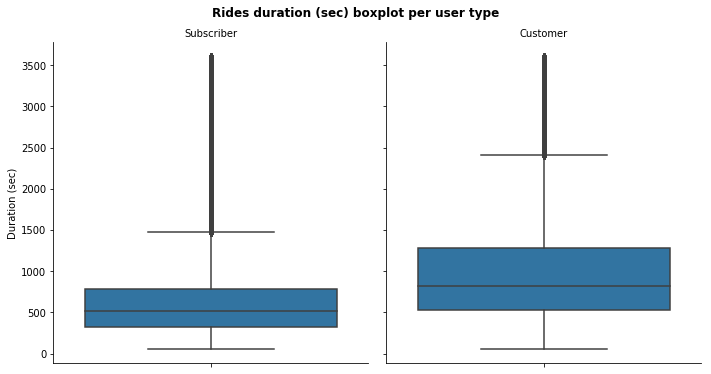

In [16]:
bike_t = df_new.query('duration_sec < 3600')
bike_dur = sb.catplot(data=bike_t, y='duration_sec', col="user_type", kind='box')
bike_dur.set_titles(col_template = '{col_name}')
bike_dur.set_axis_labels("", "Duration (sec)")
bike_dur.fig.suptitle('Rides duration (sec) boxplot per user type', y=1.03, fontsize=12, fontweight='semibold');

## Summary

> Ford GoBike System is a very convinient tool, no matter is for casual activities or daily commute purpose. It saves people a lot of time, also people can use it to replace train/bus sometimes. Therefore at the end of year, maybe once a week, 4 times a month, etc. (many a little makes a mickle), This behavior will promote/ensure human health more or less. 